# Convolutional Neural Network (CNN)

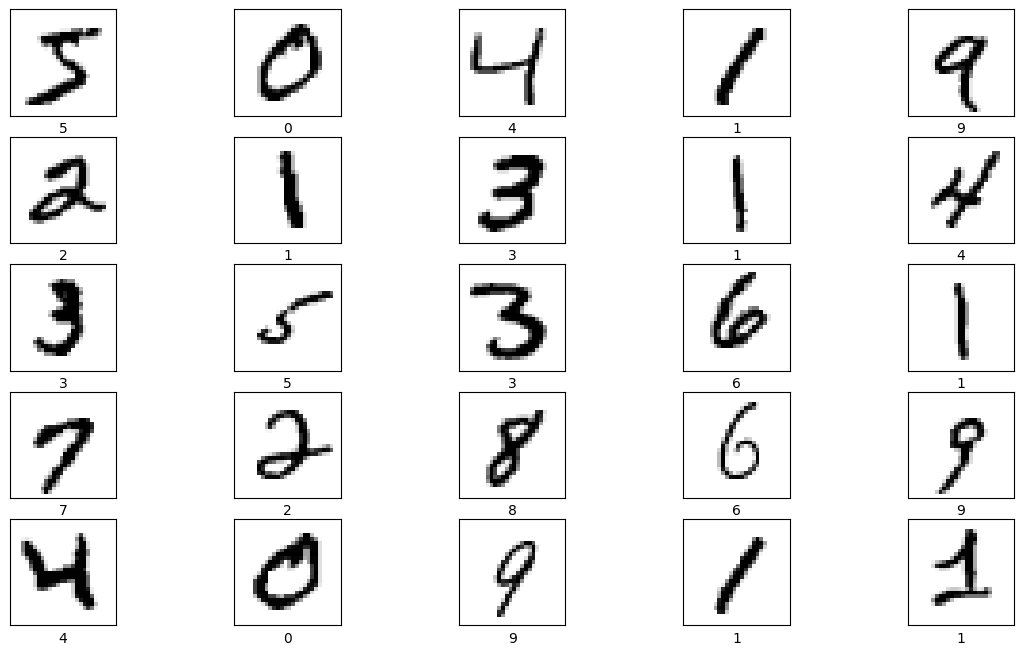

In [54]:
# import libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Display some sample images 
plt.figure(figsize=(14, 8))
for i in range (25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [55]:
# explore the data 
print(f"We have {len(X_train)} images in the training set and {len(X_test)} images in the test set")
print(f"The size of the images is {X_train[0].shape}.")

We have 60000 images in the training set and 10000 images in the test set
The size of the images is (28, 28).


In [56]:
X_train.shape

(60000, 28, 28)

In [57]:
y_train.shape

(60000,)

In [58]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

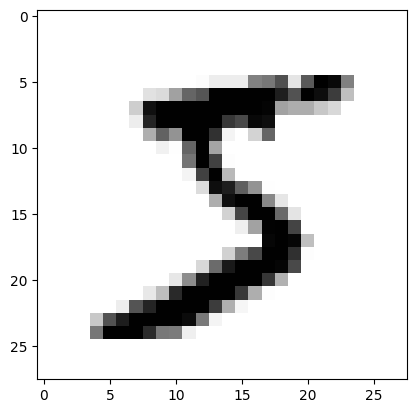

In [59]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap=plt.cm.binary)

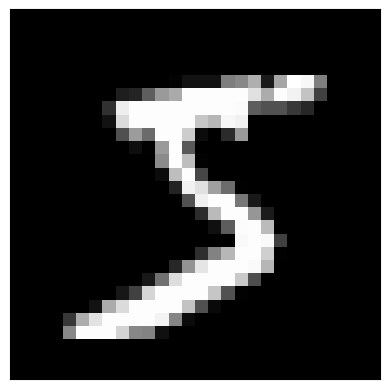

Pixel values:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   

In [60]:
# Display the first image in the dataset as a data matrix
plt.imshow(X_train[0], cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

# Display the values of each pixel in the image
print("Pixel values:")
for row in X_train[0]:
    for pixel in row:
        print("{:3}".format(pixel), end=" ") 
    print()

In [61]:
# also need to change the data type to float32 Data Normalize 
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


Pixel values after normalizaion:
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.012 0.071 0.071 0.071 0.494 0.533 0.686 0.102 0

<Figure size 640x480 with 0 Axes>

<Axes: >

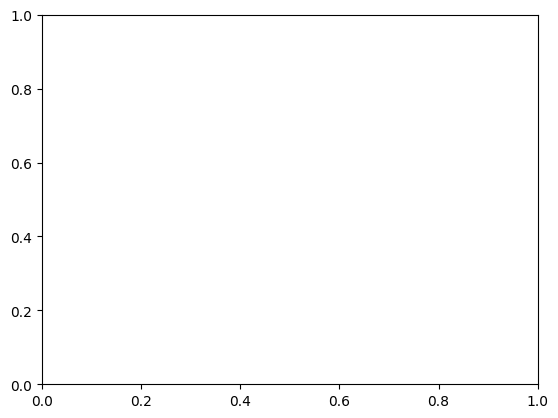

In [62]:
# Display the values of each pixel in the image after normaliztion
print("\nPixel values after normalizaion:")
for row in X_train[0]:
    for pixel in row:
        print("{:0.3f}".format(pixel), end=" ")
    print()

# Reshape the images to have a channel dimension
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Display the complete output of the cell
display(plt.gcf())
display(plt.gca())

# Build the model

In [63]:
import tensorflow as tf 
from tensorflow.keras import layers

# create an input layer 
input_layer = tf.keras.layers.Input(shape=(28, 28, 1)) # 28x28 pixel images with a single color channel

# CNN model building

model = tf.keras.Sequential([
    input_layer, # input layer 
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    # filter is the number of filters we want to apply
    # kernel is the size of window/filter moving over the image
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer

    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer

    layers.Flatten(), # flatten layer
    layers.Dense(10, activation='softmax') # output layer # why did we add 10?
])


In [64]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 26, 26, 10)        100       
                                                                 
 conv2d_44 (Conv2D)          (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 12, 12, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_45 (Conv2D)          (None, 10, 10, 10)        910       
                                                                 
 conv2d_46 (Conv2D)          (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 4, 4, 10)          0         
 ng2D)                                                

In [66]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [67]:
# train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2) 

Epoch 1/5
750/750 [==============================] - 42s 53ms/step - loss: 0.3743 - accuracy: 0.8859 - val_loss: 0.1509 - val_accuracy: 0.9558
Epoch 2/5
750/750 [==============================] - 38s 50ms/step - loss: 0.1219 - accuracy: 0.9631 - val_loss: 0.1062 - val_accuracy: 0.9677
Epoch 3/5
750/750 [==============================] - 38s 51ms/step - loss: 0.0927 - accuracy: 0.9719 - val_loss: 0.0851 - val_accuracy: 0.9744
Epoch 4/5
750/750 [==============================] - 38s 50ms/step - loss: 0.0760 - accuracy: 0.9767 - val_loss: 0.0767 - val_accuracy: 0.9778
Epoch 5/5
750/750 [==============================] - 40s 53ms/step - loss: 0.0652 - accuracy: 0.9799 - val_loss: 0.0894 - val_accuracy: 0.9742


In [68]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 3s 11ms/step - loss: 0.0837 - accuracy: 0.9724
Test Loss: 0.08372657746076584
Test Accuracy: 0.9724000096321106


In [69]:
# Save the model to be used later
model.save('models_saved/model.h5')

c:\Users\ok\miniconda3\envs\df_env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


---

In [74]:
# grab an image
img = X_test[0]
print(img.shape)

# reshape the image to (28, 28, 1)
img = img.reshape((28, 28,1))
print(img.shape)

(28, 28, 1)
(28, 28, 1)


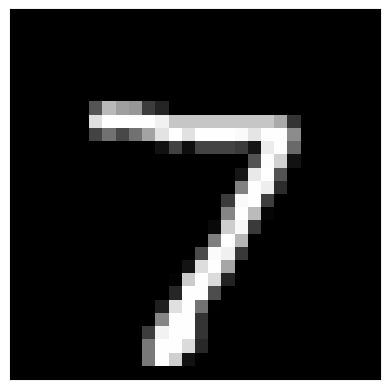

In [75]:
plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [87]:
# predict the image 
predictions = model.predict(img.reshape(1, 28, 28,1))
print(predictions)

1/1 [==============================] - 0s 30ms/step
[[8.0718482e-06 3.0355648e-07 5.2042087e-05 4.6670809e-04 8.8307443e-12
  9.8227451e-07 3.0971713e-15 9.9945074e-01 1.2260118e-06 1.9870906e-05]]


In [100]:
print(predictions[:,7])

[0.99945074]


In [105]:
print(f"The model predics that this image is a {predictions.argmax()}.")

The model predics that this image is a 7.
